<a href="https://colab.research.google.com/github/lethingoctham/bt/blob/main/kiem_dinh_t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HƯỚNG DẪN SUY DIỄN THỐNG KÊ BẰNG GÓI STATS CỦA THƯ VIỆN SCIPY

1.Các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd
import random
from scipy import stats
from statsmodels.stats.weightstats import ztest
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.Thiết lập định dạng hình ảnh

In [3]:
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

3.Tắt các cảnh báo của scipy

In [4]:
warnings.filterwarnings('ignore')

Một số lưu ý khi kiểm định giả thuyết trong thống kê suy diễn 

(1) Cỡ mẫu thường nhỏ ( n<30 ) để có ý nghĩa thống kê
(2) Các mẫu quan sát được (sample observations) phải được lựa chọn ngẫu nhiên từ quần thể

(3) Các đại lượng như trung bình mẫu (sample mean), độ lệch chuẩn của mẫu (standard deviation), phương sai mẫu (sample variance) được tính từ tập mẫu quan sát được.

(4) Giả định rằng quần thể được nghiên cứu lấy mẫu xấp xỉ với phân phối chuẩn.

1.Các bước thực hiện kiểm định giả thuyết (sử dụng kiểm định t)

Bước 1: Thực hiện các phép đo, hay thu thập dữ liệu quan sát

Bước 2: Phát biểu giả thuyết H0 và giả thuyết thay thế Ha

Bước 3: Xác định mức α (hay khoảng tin cậy)

Bước 4: Lấy mẫu và tính toán các đại lượng thống kê của mẫu

Bước 5: Thực hiện kiểm định t (t-test)

Bước 6: Kết luận dựa vào kết quả kiểm định

KIỂM ĐỊNH GIẢ THUYẾT MỘT ĐUÔI

1.Kỹ thuật sinh dữ liệu ngẫu nhiên
Sinh các mẫu ngẫu nhiên lấy ra từ phân phối chuẩn bằng hàm random.normal() với các tham số:

- mean: giá trị trung bình của quần thể

- scale: độ lệch chuẩn của quần thể (không âm)

- size: kích thước mẫu

In [18]:
#Sinh ngẫu nhiên 28 mẫu tuân theo phân phối chuẩn có trung bình mẫu là 1 và độ lệch chuẩn là 0.1
mean = 1
std = 0.1
N = 28
samples = np.random.normal(mean, std, N)

In [19]:
#In ra 10 phần tử đầu tiên
print(samples[:10])

[1.07495051 0.92341959 1.21704991 0.93525817 0.99848719 1.08632852
 0.93305772 1.03255978 1.15457639 1.0052903 ]


In [20]:
#In ra các giá trị max, min của samples
print('Max: ', max(samples))
print('Min: ', min(samples))

Max:  1.2170499106662054
Min:  0.8290919132471412


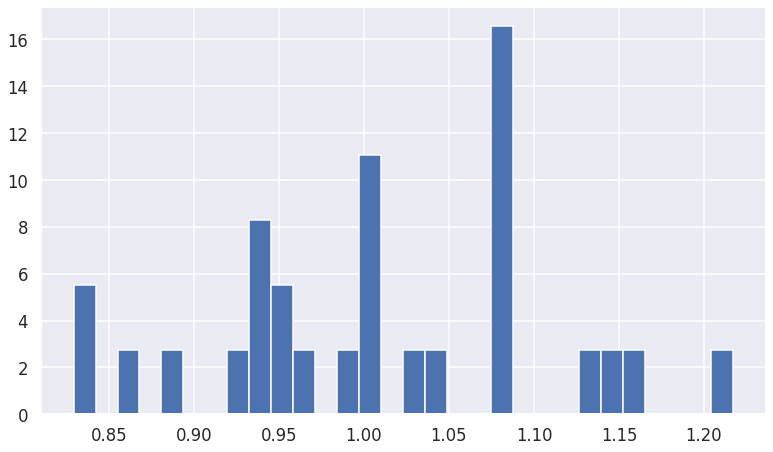

In [21]:
#Vẽ histogram của mẫu vừa được sinh ngẫu nhiên
plt.hist(samples, 30, density=True)
plt.show()

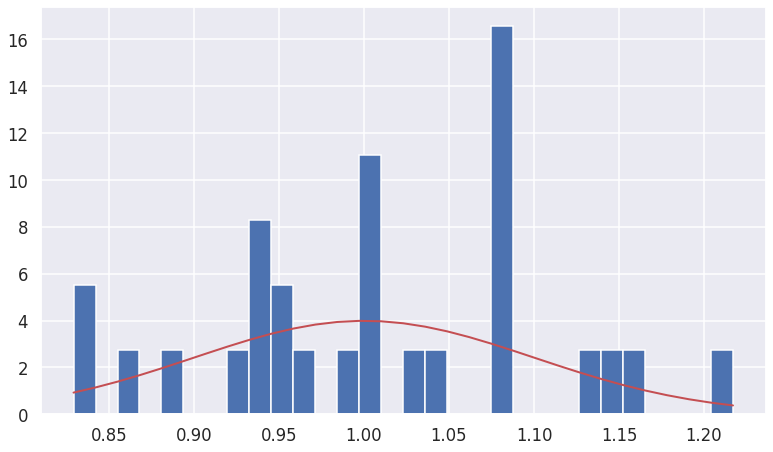

In [22]:
#Vẽ đường phân phối chuẩn cùng với histogram
count, bins, ignored = plt.hist(samples, 30, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.show()

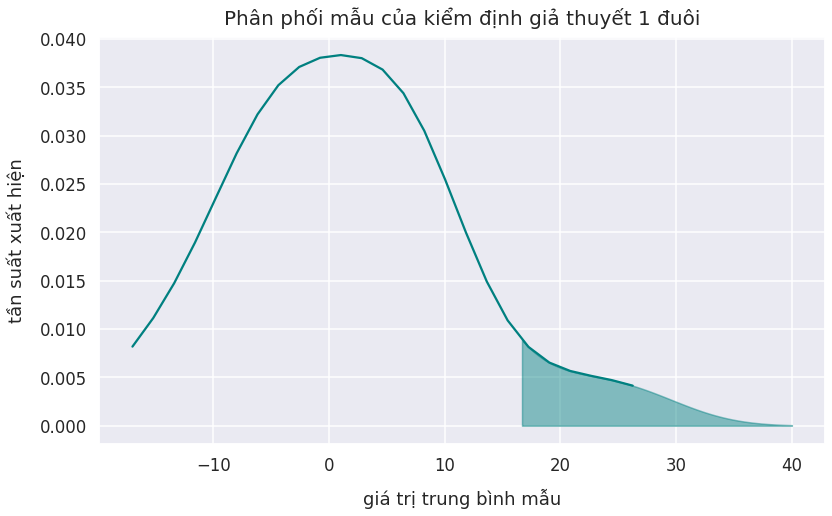

In [23]:
#Sinh ngẫu nhiên 28 mẫu theo phân phối chuẩn có mean = 0 và std = 10
samples = np.random.normal(loc=0, scale=10, size=28)
#Minh họa một đuôi và mức alpha = 0.05
two_std_from_mean = np.mean(samples) + np.std(samples)*1.645
#kernel density
kde = stats.gaussian_kde(samples)
#Trả về 25 giá trị phân bố bằng nhau trong khoảng từ min tới max của samples 
pos = np.linspace(np.min(samples), np.max(samples), 25)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 40, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')
plt.title("Phân phối mẫu của kiểm định giả thuyết 1 đuôi", y=1.015, fontsize=20)
plt.xlabel("giá trị trung bình mẫu", labelpad=14)
plt.ylabel("tần suất xuất hiện", labelpad=14);

2.Hình minh họa các kiểm định 1-đuôi, 2-đuôi

In [24]:
# Sử dụng hình minh họa
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032933/Screenshot37.png", width=300, height=300)

In [25]:
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032937/Screenshot39.png", width=300, height=300)

In [26]:
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032935/Screenshot38.png", width=300, height=300)



1.Xây dựng một kiểm định t cụ thể với số liệu được sinh ngẫu nhiên theo phân phối chuẩn

Bài toán: Cân 15 con thỏ ở một trại chăn nuôi khi xuất chuồng ta tính được $\overline{\rm x} = 3.62$kg. Cho biết $\sigma = 0.1$. Chủ trại cho biết trọng lượng trung bình của thỏ là 3,5 kg thì có tin được không với mức ý nghĩa là $\alpha = 1$%

Xây dựng giả thuyết

$$H_{0}: \mu = 3.5$$

Giả thuyết thay thế: 
$$H_{a}: \mu =  3.5 $$
$$H_{a}: \mu_ \neq 3.5$$

Với: 
- Hệ số sig =0.01
- Chỉ số tương ứng với hệ số sig ở trên là 2.58
Công thức:
$$Z = \frac{(\overline{\rm x} - \mu)}{(\sigma / \sqrt{n})}$$

Áp dụng với các giá trị nêu trên:

- $\overline{\rm X} =3.62 $kg
- $\mu = 3.5$
- $\sigma =0.1 $
- $\alpha =0.01 $
- $n =15$

$$t = \frac{(3.62 - 3.5)}{(0.1 / \sqrt{15})} = 4.6$$

Giá trị z = 4.6 > 2.58 nên có bằng chứng để bác bỏ giả thuyết $H_{0}$


Lập trình Python cho bài toán nêu trên

In [7]:
#Sinh ngẫu nhiên một mẫu 15 phần tử có trung bình mẫu là 3.62, độ lệch chuẩn là 0.1
sample1 = np.random.normal(3.62, 0.1, 15)
print(sample1)

[3.67879425 3.55770223 3.4693244  3.58219659 3.46199973 3.66541552
 3.59519847 3.73660855 3.59631554 3.50816074 3.51706833 3.64690295
 3.6463834  3.64658835 3.67703966]


In [9]:
#Xác định các thông số
null_mean = 3.5
alpha = 0.01

In [8]:
#Kiểm định t
import statsmodels
ttest, p_value = stats.ttest_1samp(sample1, null_mean)
print('t = ', ttest, '; p = ', p_value)
if(p_value <  alpha):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

t =  4.6526884637676496 ; p =  0.0003731759063615864
Có bằng chứng để bác bỏ giả thuyết H0


Kiểm định giả thuyết 2-đuôi

Một cách tổng quát, giả sử chúng ta có 2 quần thể độc lập và tuân theo phân phối chuẩn. Lấy ra 2 mẫu ngẫu nhiên tử 2 quần thể này.

Xây dựng giả thuyết:

$$H_{0}: \mu_{1} = \mu_{2}$$

Giả thuyết thay thế:

$$H_{a}: \mu_{1} \neq \mu_{2}$$

Thực hiện kiểm định t và so sánh với giá trị $t_{\frac{\alpha}{2}}$ để đi đến kết luận cuối cùng.

Bài Toán: Đo đường kính 15 trục máy do máy A sản xuất và 17 trục máy do máy B sản xuất ta tính được $\overline{\rm x_{1}} =251$, 7; $s_{1}$ = 52, 853 và $\overline{\rm x_{2}} =249.8$; $s_{1}$ = 56.2. Mức ý nghĩa 1%.

Kiểm định t 2 đuôi

In [10]:
#Lập trình python minh họa
#Sinh ngẫu nhiên sample A có 15 phần tử với mean = 251, std có hiệu chỉnh = 52,853
samples_A = np.random.normal(251, 52.853, 15)
print(samples_A)

[222.66853872 312.19025453 237.20934668 270.25985403 223.41393862
 169.96708835 229.92760764 281.01590399 149.75790732 235.24717753
 268.33755327 182.68819693 234.09073146 260.09309404 295.43759527]


In [11]:
#Sinh ngẫu nhiên sample B có 17 phần tử với mean = 249.2 std = 56.2
samples_B = np.random.normal(249.2, 56.2, 17)
print(samples_B)

[268.06504874 181.09155549 341.14907745 297.25374817 238.94047029
 258.40751087 362.16569917 197.6961878  278.21823714 218.77318598
 349.71223205 216.73275794 272.97629429 234.07749111 185.13005444
 321.92126568 173.30937475]


In [19]:
#Kiểm định giả thuyết
#T-test cho phương tiện của hai mẫu độc lập từ thống kê mô tả. Từ bài toán trên
alpha1 = 0.01
ttest_score, p_value = stats.ttest_ind_from_stats(mean1 = 251, mean2 = 249.2, std1 = 52.853, std2 = 56.2, nobs1 = 15, nobs2 = 17)
print('t = ', ttest_score, '; p = ', p_value)
if(p_value <  alpha1):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

t =  0.09295431850582912 ; p =  0.9265578548372626
Chưa có bằng chứng để bác bỏ giả thuyết H0


In [20]:
#Kiểm định giả thuyết:
#Tính toán kiểm tra T cho giá trị trung bình của hai mẫu điểm độc lập . 
alpha1 = 0.01
ttest_score1, p_value1 = stats.ttest_ind(samples_A, samples_B, axis=0, equal_var=True, nan_policy='propagate')
print('t_score = ', ttest_score1, '; p_value = ', p_value1)
if(p_value <  alpha1):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

t_score =  -1.0647820383545057 ; p_value =  0.2954699421736512
Chưa có bằng chứng để bác bỏ giả thuyết H0
